<a href="https://colab.research.google.com/github/hegone/urban-pollution-trends-ml/blob/main/ARIMA_PM25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Load the dataset
file_path = '/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' # replace with adeqaute file location
data = pd.read_csv(file_path)

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Use auto_arima to conduct a more exhaustive search
sarima_model_pm25 = auto_arima(train_data_pm25,
                               seasonal=True,
                               m=12,  # Assuming that the seasonality is yearly
                               start_p=0, start_q=0, max_p=3, max_q=3,
                               start_P=0, start_Q=0, max_P=2, max_Q=2,
                               d=1, D=1,  # Non-seasonal and seasonal differencing
                               trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=False)  # Disable stepwise for a full grid search

# Output the best SARIMA parameters
best_order = sarima_model_pm25.order
best_seasonal_order = sarima_model_pm25.seasonal_order
print(f"Best SARIMA order: {best_order}")
print(f"Best Seasonal order: {best_seasonal_order}")


 ARIMA(0,1,0)(0,1,0)[12]             : AIC=579.445, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=565.127, Time=0.29 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=567.127, Time=0.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=569.509, Time=0.28 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=567.127, Time=0.77 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=3.72 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=569.034, Time=0.63 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.34 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=556.956, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=536.502, Time=0.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=538.478, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=540.983, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=538.469, Time=0.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.31 sec
 ARIMA(0,1,1)(2,1,0)[12]  

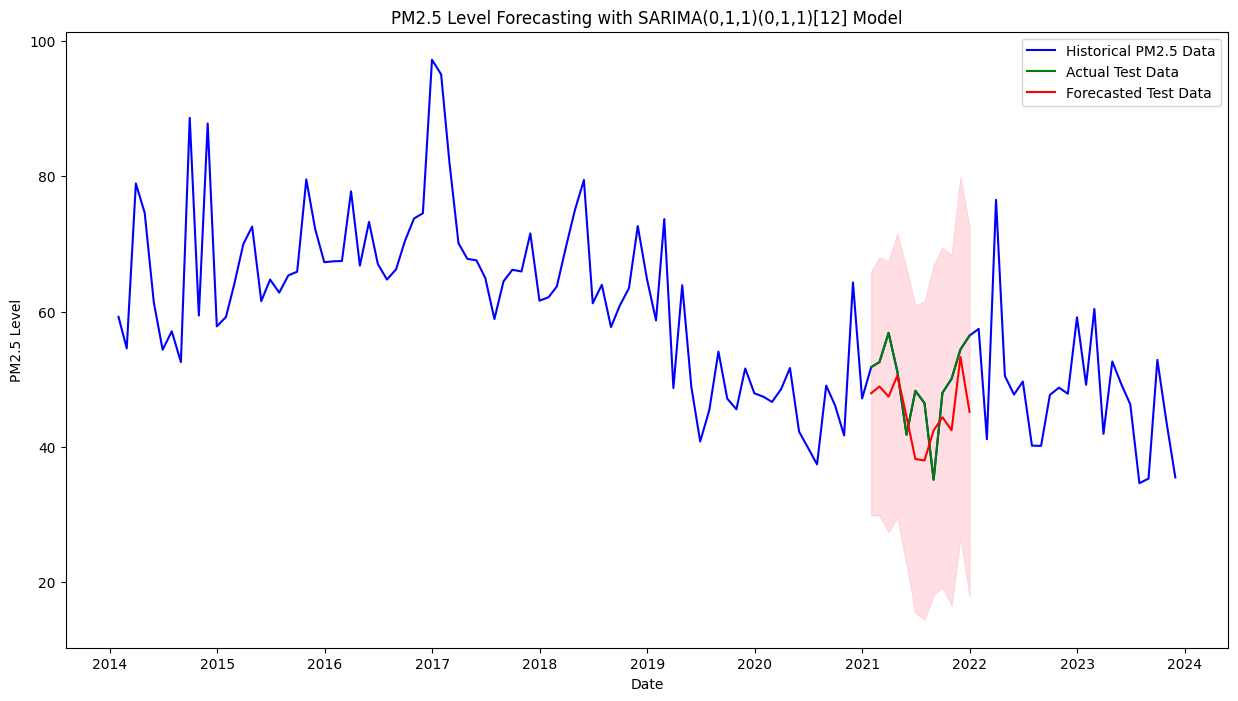

The Root Mean Squared Error of our forecasts is: 6.768768632751173


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' ) # replace with adeqaute file location

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Split the data into training and testing sets
train_data_pm25 = data_monthly_pm25[:'2020']
test_data_pm25 = data_monthly_pm25['2021']

# Fit the SARIMAX model with the identified best parameters
best_order = (0, 1, 1)
best_seasonal_order = (0, 1, 1, 12)
model_pm25 = SARIMAX(train_data_pm25, order=best_order, seasonal_order=best_seasonal_order,
                     enforce_stationarity=False, enforce_invertibility=False)
results_pm25 = model_pm25.fit()

# Forecast for the test period
forecast_pm25 = results_pm25.get_forecast(steps=len(test_data_pm25))
forecast_mean_pm25 = forecast_pm25.predicted_mean

# Calculate the Root Mean Squared Error (RMSE)
rmse_pm25 = sqrt(mean_squared_error(test_data_pm25, forecast_mean_pm25))

# Plot the historical data and the forecast with confidence intervals
plt.figure(figsize=(15, 8))
plt.plot(data_monthly_pm25, label='Historical PM2.5 Data', color='blue')
plt.plot(test_data_pm25.index, test_data_pm25, label='Actual Test Data', color='green')
plt.plot(test_data_pm25.index, forecast_mean_pm25, label='Forecasted Test Data', color='red')
plt.fill_between(test_data_pm25.index,
                 forecast_pm25.conf_int().iloc[:, 0],
                 forecast_pm25.conf_int().iloc[:, 1],
                 color='pink', alpha=0.5)
plt.title('PM2.5 Level Forecasting with SARIMA(0,1,1)(0,1,1)[12] Model')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

# Output the RMSE
print('The Root Mean Squared Error of our forecasts is:', rmse_pm25)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


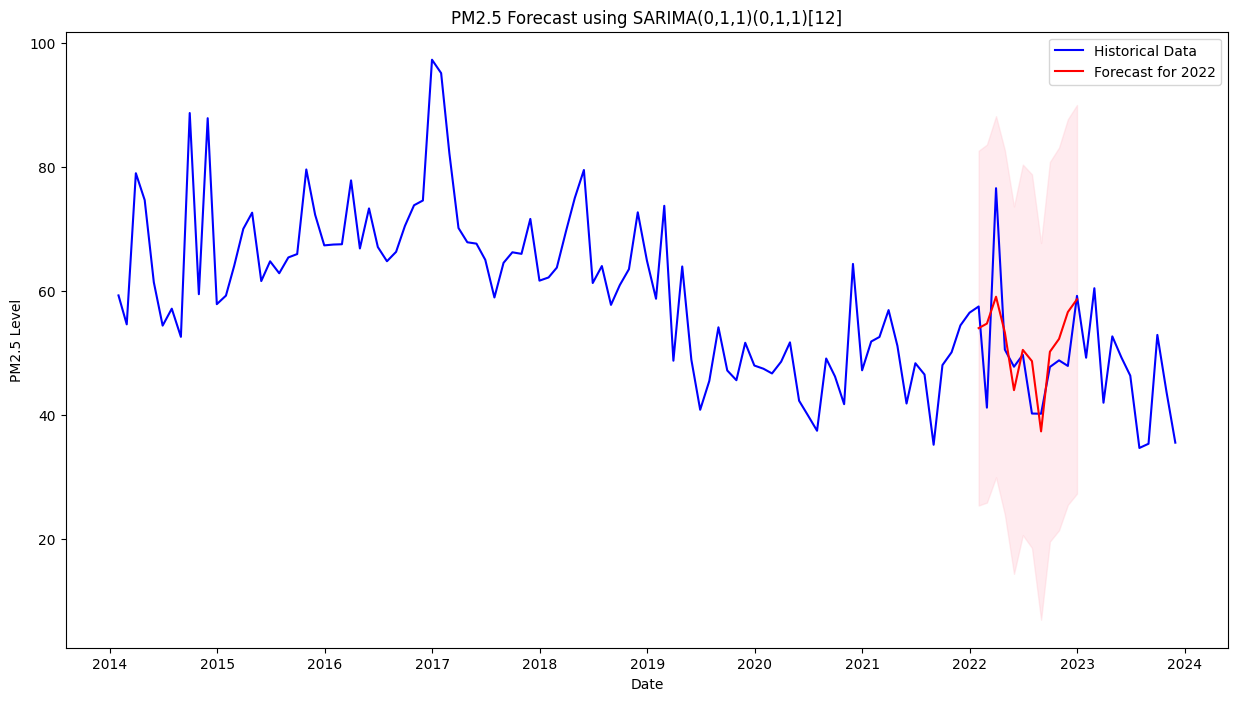

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' ) # replace with adeqaute file location

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Isolate the training data for 2020 and 2021
train_data_pm25 = data_monthly_pm25['2020':'2021']

# Define the SARIMA model parameters
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(train_data_pm25, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for 2022
n_periods = 12  # assuming monthly data and forecasting one year ahead
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=train_data_pm25.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')
forecast_mean = forecast.predicted_mean

# Plot the historical data and the forecast
plt.figure(figsize=(15, 8))
plt.plot(data_monthly_pm25, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast for 2022', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('PM2.5 Forecast using SARIMA(0,1,1)(0,1,1)[12]')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


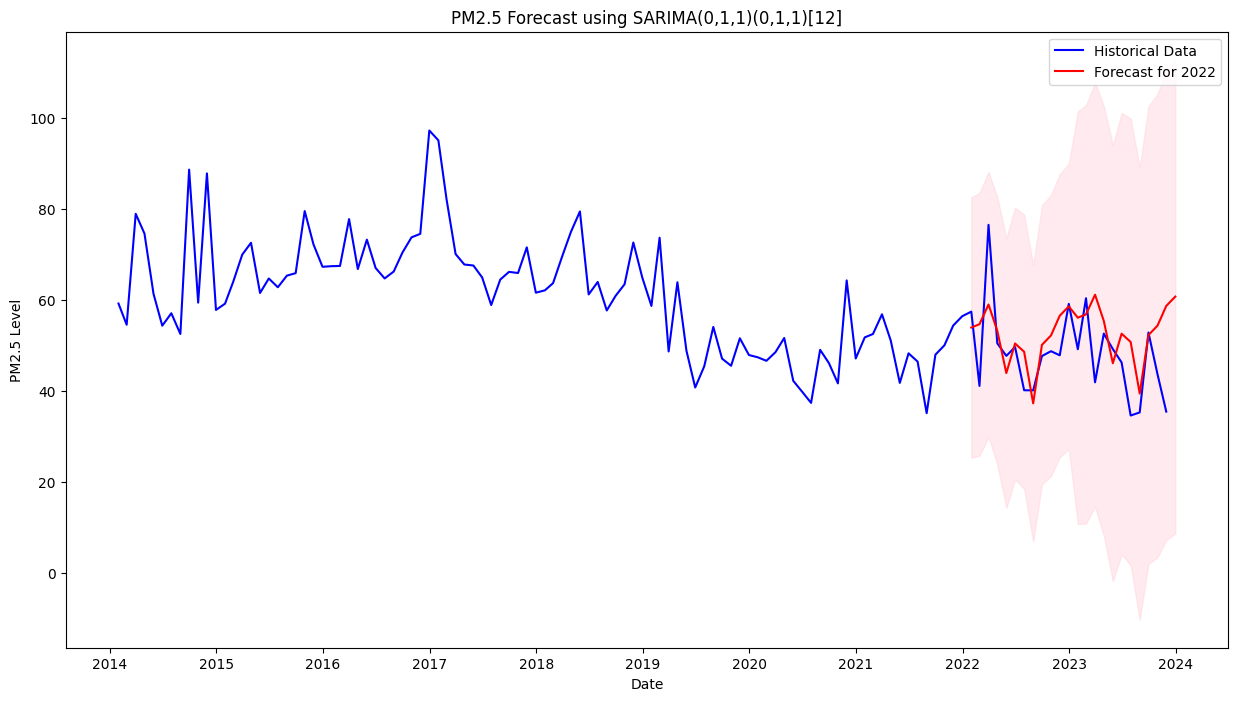

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' ) # replace with adeqaute file location

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Isolate the training data for 2020 and 2021
train_data_pm25 = data_monthly_pm25['2020':'2021']

# Define the SARIMA model parameters
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(train_data_pm25, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for 2023
n_periods = 24  # assuming monthly data and forecasting one year ahead
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=train_data_pm25.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')
forecast_mean = forecast.predicted_mean

# Plot the historical data and the forecast
plt.figure(figsize=(15, 8))
plt.plot(data_monthly_pm25, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast for 2022', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('PM2.5 Forecast using SARIMA(0,1,1)(0,1,1)[12]')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


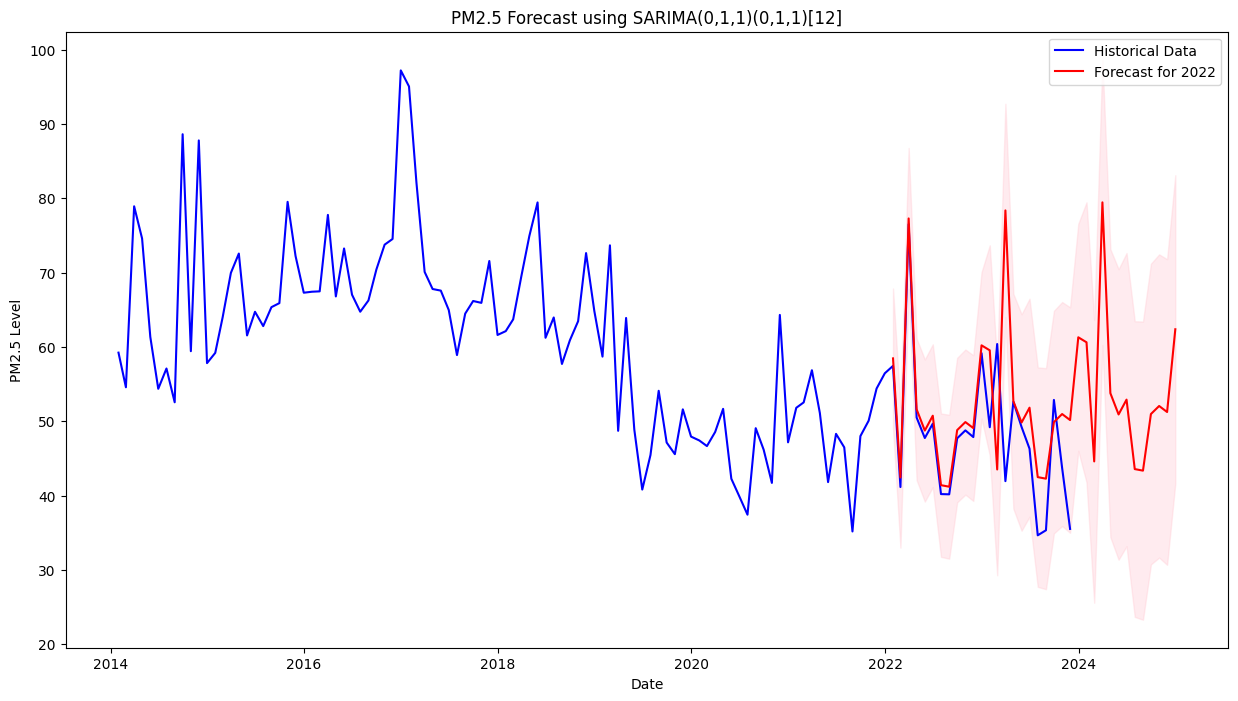

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' ) # replace with adeqaute file location

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Isolate the training data from 2020 to 2022
train_data_pm25_2020_to_2022 = data_monthly_pm25['2020':'2022']

# Define the SARIMA model parameters
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Fit the SARIMA model using the extended training data
model = SARIMAX(train_data_pm25_2020_to_2022, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12),
                             enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for 2023
n_periods = 36  # assuming monthly data and forecasting one year ahead
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=train_data_pm25.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')
forecast_mean = forecast.predicted_mean

# Plot the historical data and the forecast
plt.figure(figsize=(15, 8))
plt.plot(data_monthly_pm25, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast for 2022', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('PM2.5 Forecast using SARIMA(0,1,1)(0,1,1)[12]')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


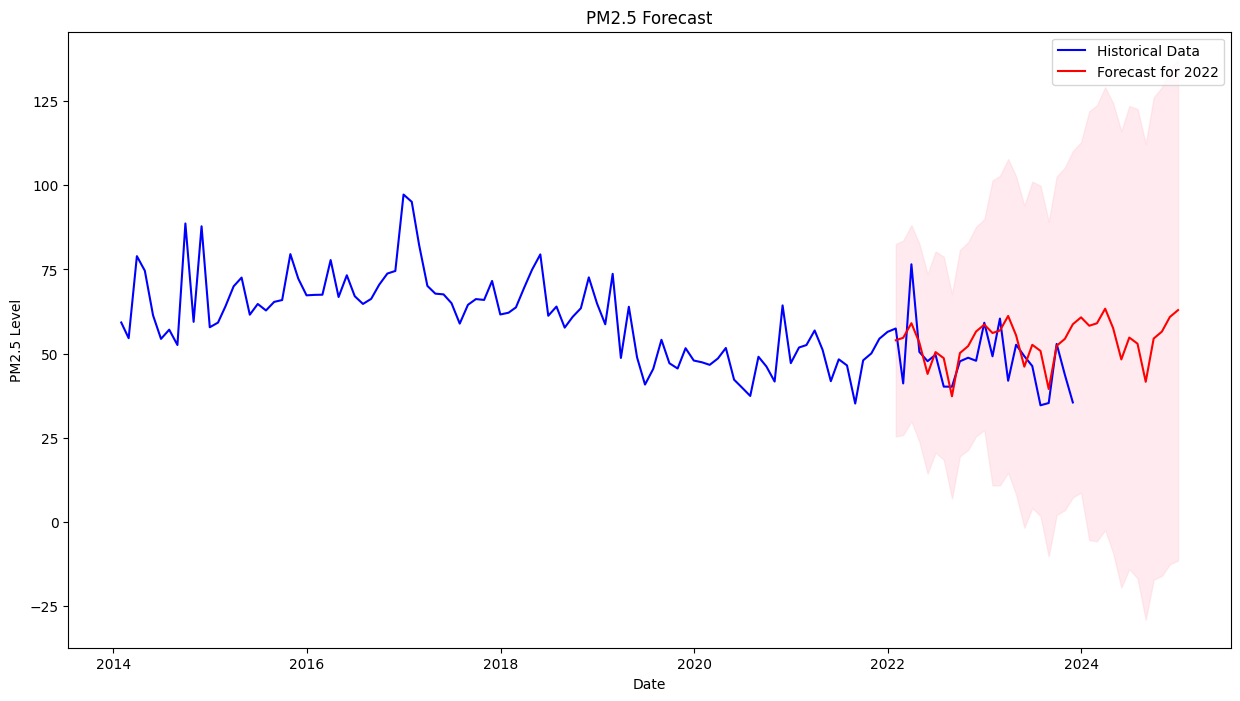

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Air Quality Forecast/London/Cleaned_London_Air_Quality.csv' ) # replace with adeqaute file location

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample the data to get monthly averages for PM2.5
data_monthly_pm25 = data['pm25'].resample('M').mean().dropna()

# Isolate the training data for 2020 and 2021
train_data_pm25 = data_monthly_pm25['2020':'2021']

# Define the SARIMA model parameters
order = (0, 1, 1)
seasonal_order = (0, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(train_data_pm25, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast for 2023
n_periods = 36  # assuming monthly data and forecasting one year ahead
forecast = results.get_forecast(steps=n_periods)
forecast_index = pd.date_range(start=train_data_pm25.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


# Plot the historical data and the forecast
plt.figure(figsize=(15, 8))
plt.plot(data_monthly_pm25, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast for 2022', color='red')
plt.fill_between(forecast_index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.title('PM2.5 Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.show()

# Output the forecasted values and confidence intervals
forecast_output = pd.DataFrame({'Forecast': forecast_mean,
                                'Lower CI': forecast_conf_int.iloc[:, 0],
                                'Upper CI': forecast_conf_int.iloc[:, 1]},
                               index=forecast_index)

# Save forecast data to a CSV file
forecast_output.to_csv('/content/drive/MyDrive/Air Quality Forecast/London/PM25_Forecast_2024.csv')

# The path to the saved forecast CSV file
forecast_output_path = '/content/drive/MyDrive/Air Quality Forecast/London/PM25_Forecast_2024.csv' # replace with adeqaute file location
